In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
train=pd.read_csv("train.csv")
test=pd.read_csv("test.csv")

In [3]:
pd.set_option("display.max_columns",100)
pd.set_option("display.max_rows",100)

In [4]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [7]:
train.isnull().sum().sort_values(ascending=False)[:20]

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageCond        81
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
BsmtExposure      38
BsmtFinType2      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrArea         8
MasVnrType         8
Electrical         1
Utilities          0
dtype: int64

In [8]:
def only_null(dataframe):
    a=dataframe.isnull().sum().sort_values(ascending=False)
    b=0
    for i in a:
        if i>0:
            b=b+1         
        else:
            continue
    return dataframe.isnull().sum().sort_values(ascending=False)[:b]

In [9]:
only_null(train)

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageCond        81
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
BsmtExposure      38
BsmtFinType2      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrArea         8
MasVnrType         8
Electrical         1
dtype: int64

In [10]:
a=only_null(train)
a.index# to get the names of the columns in tha variable a we use index function as it ia a series

Index(['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu', 'LotFrontage',
       'GarageCond', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual',
       'BsmtExposure', 'BsmtFinType2', 'BsmtFinType1', 'BsmtCond', 'BsmtQual',
       'MasVnrArea', 'MasVnrType', 'Electrical'],
      dtype='object')

In [11]:
train.PoolQC.head()

0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
Name: PoolQC, dtype: object

In [12]:
train.PoolQC.dropna()

197     Ex
810     Fa
1170    Gd
1182    Ex
1298    Gd
1386    Fa
1423    Gd
Name: PoolQC, dtype: object

In [13]:
train.drop(["PoolQC","Id"],axis="columns")

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,Ex,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,NaN,NaN,0,8,2007,WD,Normal,175000
1456,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,TA,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,1978.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,None,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,Ex,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,1941.0,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,Mn,GLQ,49,Rec,1029,0,1078,GasA,Gd,Y,FuseA,1078,0,0,1078,1,0,1,0,2,1,Gd,5,Typ,0,NaN,Attchd,1950.0,Unf,1,240,TA

In [14]:
train.Utilities.unique()

array(['AllPub', 'NoSeWa'], dtype=object)

In [15]:
train.Alley.isnull().mean()

0.9376712328767123

In [16]:
val=only_null(train)

In [17]:
print("The null value percentage of the columns is : ")
for i in val.index:
    print(i,"the percentage is",np.round(train[i].isnull().mean(),4),"%")
    

The null value percentage of the columns is : 
PoolQC the percentage is 0.9952 %
MiscFeature the percentage is 0.963 %
Alley the percentage is 0.9377 %
Fence the percentage is 0.8075 %
FireplaceQu the percentage is 0.4726 %
LotFrontage the percentage is 0.1774 %
GarageCond the percentage is 0.0555 %
GarageType the percentage is 0.0555 %
GarageYrBlt the percentage is 0.0555 %
GarageFinish the percentage is 0.0555 %
GarageQual the percentage is 0.0555 %
BsmtExposure the percentage is 0.026 %
BsmtFinType2 the percentage is 0.026 %
BsmtFinType1 the percentage is 0.0253 %
BsmtCond the percentage is 0.0253 %
BsmtQual the percentage is 0.0253 %
MasVnrArea the percentage is 0.0055 %
MasVnrType the percentage is 0.0055 %
Electrical the percentage is 0.0007 %


In [18]:
train.groupby("PoolQC")['SalePrice'].count()

PoolQC
Ex    2
Fa    2
Gd    3
Name: SalePrice, dtype: int64

In [19]:
train.PoolQC.value_counts()

Gd    3
Fa    2
Ex    2
Name: PoolQC, dtype: int64

In [20]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [21]:
numerical=[i for i in train.columns if train[i].dtypes !="O"  ] #gives only the numrical dtype when != "O" and the object types when =="O"

In [22]:
len(numerical)

38

In [23]:
numerical

['Id',
 'MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SalePrice']

In [24]:
year_feature=[feature for feature in numerical if "yr" in feature.lower() or "year" in feature.lower()]

In [25]:
year_feature

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

In [26]:
unique_year_list=[]
for i in year_feature:
    unique_year_list.append(train[i].unique())
unique_year_list    

[array([2003, 1976, 2001, 1915, 2000, 1993, 2004, 1973, 1931, 1939, 1965,
        2005, 1962, 2006, 1960, 1929, 1970, 1967, 1958, 1930, 2002, 1968,
        2007, 1951, 1957, 1927, 1920, 1966, 1959, 1994, 1954, 1953, 1955,
        1983, 1975, 1997, 1934, 1963, 1981, 1964, 1999, 1972, 1921, 1945,
        1982, 1998, 1956, 1948, 1910, 1995, 1991, 2009, 1950, 1961, 1977,
        1985, 1979, 1885, 1919, 1990, 1969, 1935, 1988, 1971, 1952, 1936,
        1923, 1924, 1984, 1926, 1940, 1941, 1987, 1986, 2008, 1908, 1892,
        1916, 1932, 1918, 1912, 1947, 1925, 1900, 1980, 1989, 1992, 1949,
        1880, 1928, 1978, 1922, 1996, 2010, 1946, 1913, 1937, 1942, 1938,
        1974, 1893, 1914, 1906, 1890, 1898, 1904, 1882, 1875, 1911, 1917,
        1872, 1905], dtype=int64),
 array([2003, 1976, 2002, 1970, 2000, 1995, 2005, 1973, 1950, 1965, 2006,
        1962, 2007, 1960, 2001, 1967, 2004, 2008, 1997, 1959, 1990, 1955,
        1983, 1980, 1966, 1963, 1987, 1964, 1972, 1996, 1998, 1989, 1953,
   

YrSold
2006    163995
2007    167000
2008    164000
2009    162000
2010    155000
Name: SalePrice, dtype: int64


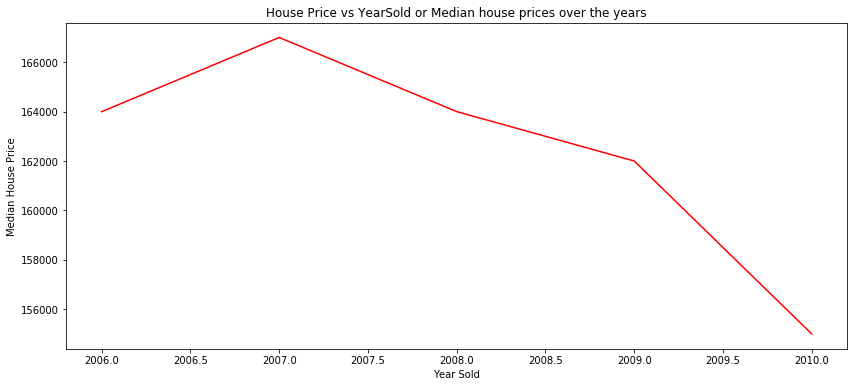

In [28]:
print(train.groupby("YrSold")["SalePrice"].median())
plt.figure(figsize=(14,6))
train.groupby("YrSold")["SalePrice"].median().plot(color="r");
plt.xlabel('Year Sold');
plt.ylabel('Median House Price');
plt.title("House Price vs YearSold or Median house prices over the years");

YrSold
2006    182549.458599
2007    186063.151976
2008    177360.838816
2009    179432.103550
2010    177393.674286
Name: SalePrice, dtype: float64


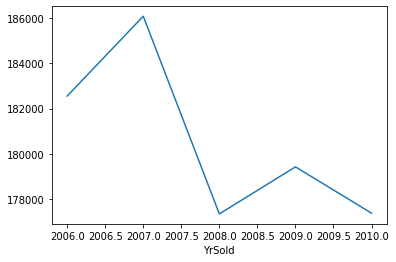

In [29]:
print(train.groupby("YrSold")["SalePrice"].mean())
train.groupby("YrSold")["SalePrice"].mean().plot()

In [30]:
#the types of numerical variables : discrete and continous


In [31]:
discrete_feature=[feature for feature in numerical if len(train[feature].unique())<25 and feature not in year_feature+["Id"]]

In [32]:
discrete_feature

['MSSubClass',
 'OverallQual',
 'OverallCond',
 'LowQualFinSF',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 '3SsnPorch',
 'PoolArea',
 'MiscVal',
 'MoSold']

In [33]:
len(discrete_feature)

17

In [34]:
train[discrete_feature].head()

,MSSubClass,OverallQual,OverallCond,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,3SsnPorch,PoolArea,MiscVal,MoSold
0,60,7,5,0,1,0,2,1,3,1,8,0,2,0,0,0,2
1,20,6,8,0,0,1,2,0,3,1,6,1,2,0,0,0,5
2,60,7,5,0,1,0,2,1,3,1,6,1,2,0,0,0,9
3,70,7,5,0,1,0,1,0,3,1,7,1,3,0,0,0,2
4,60,8,5,0,1,0,2,1,4,1,9,1,3,0,0,0,12


MSSubClass
20     159250
30      99900
40     142500
45     107500
50     132000
60     215200
70     156000
75     163500
80     166500
85     140750
90     135980
120    192000
160    146000
180     88500
190    128250
Name: SalePrice, dtype: int64


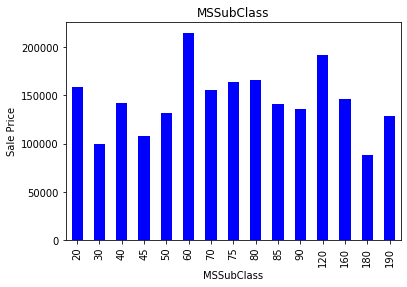

OverallQual
1      50150
2      60000
3      86250
4     108000
5     133000
6     160000
7     200141
8     269750
9     345000
10    432390
Name: SalePrice, dtype: int64


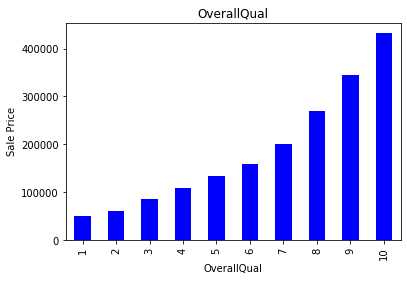

OverallCond
1     61000
2     85000
3     89500
4    115000
5    185000
6    142750
7    145000
8    142500
9    176200
Name: SalePrice, dtype: int64


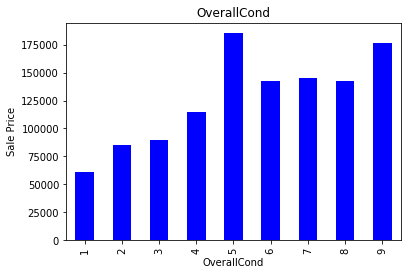

LowQualFinSF
0      163945
53     169000
80     147400
120    124900
144    135000
156     79500
205    122000
232    133000
234     84500
360    108750
371    104000
384    191000
390    130000
392    235000
397    197000
420    179500
473    115000
479    200500
481    118500
513     85000
514    102000
515    200000
528    128500
572    475000
Name: SalePrice, dtype: int64


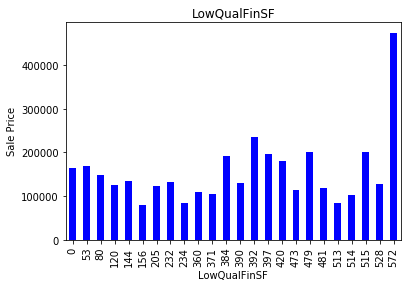

BsmtFullBath
0    154150
1    178800
2    188000
3    179000
Name: SalePrice, dtype: int64


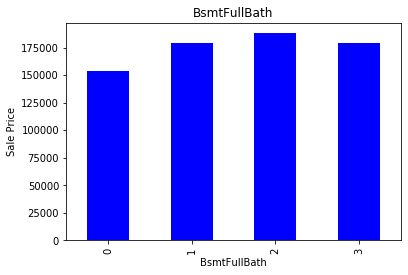

BsmtHalfBath
0    163250.0
1    159000.0
2    160850.5
Name: SalePrice, dtype: float64


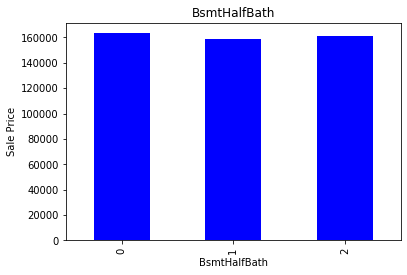

FullBath
0    145000
1    132375
2    196750
3    320000
Name: SalePrice, dtype: int64


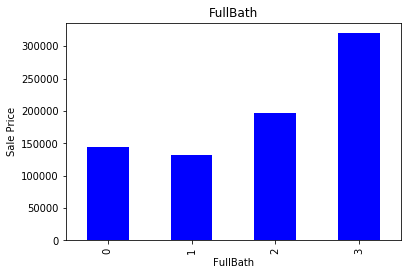

HalfBath
0    143000.0
1    189000.0
2    159243.5
Name: SalePrice, dtype: float64


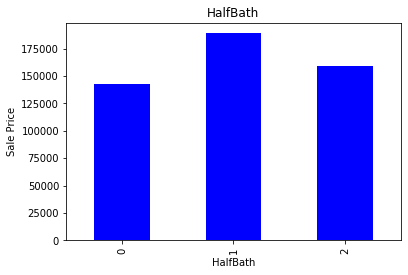

BedroomAbvGr
0    202500
1    145250
2    137250
3    169945
4    193500
5    161500
6    141000
8    200000
Name: SalePrice, dtype: int64


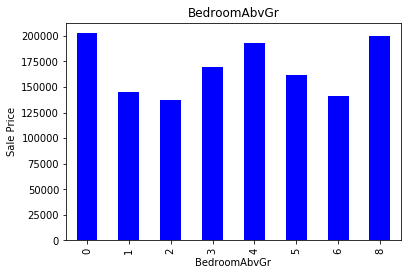

KitchenAbvGr
0    127500
1    165550
2    133900
3    109500
Name: SalePrice, dtype: int64


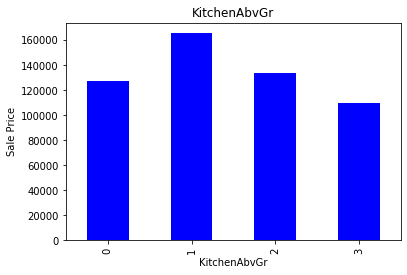

TotRmsAbvGrd
2      39300.0
3     100000.0
4     120500.0
5     130250.0
6     155000.0
7     184100.0
8     200000.0
9     252000.0
10    285000.0
11    311738.5
12    200000.0
14    200000.0
Name: SalePrice, dtype: float64


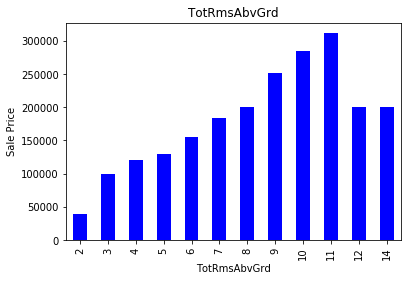

Fireplaces
0    135000
1    189975
2    206900
3    205000
Name: SalePrice, dtype: int64


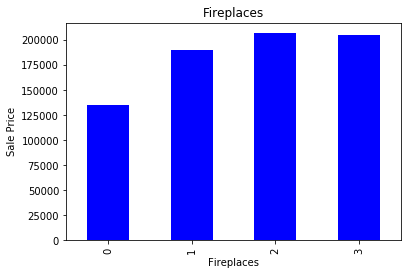

GarageCars
0    100000
1    128000
2    177750
3    295000
4    200000
Name: SalePrice, dtype: int64


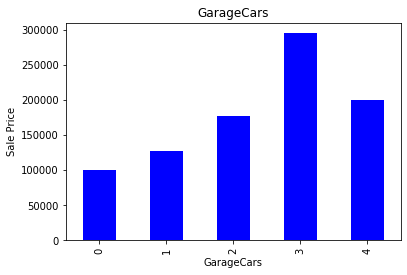

3SsnPorch
0      162000
23     169990
96     179900
130    180000
140    135000
144    211500
153    392500
162    149500
168    214000
180    135000
182    222000
196    228500
216    184500
238    194500
245    231500
290    262500
304    394617
320    143000
407    180500
508    180500
Name: SalePrice, dtype: int64


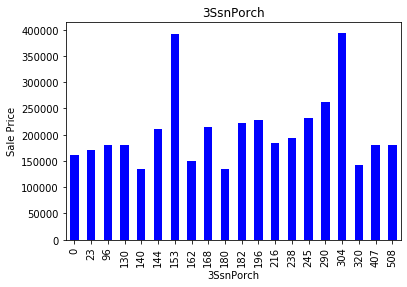

PoolArea
0      162900
480    160000
512    235000
519    250000
555    745000
576    171000
648    181000
738    274970
Name: SalePrice, dtype: int64


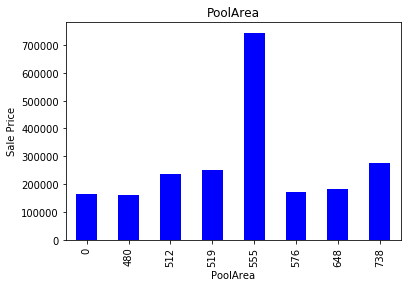

MiscVal
0        164000
54        55993
350      200000
400      140000
450      113750
480      152500
500      163950
560       81000
600      134950
620       88000
700      160000
800      110000
1150     256000
1200     122750
1300     160000
1400     163000
2000     207450
2500     266500
3500      55000
8300     190000
15500    151500
Name: SalePrice, dtype: int64


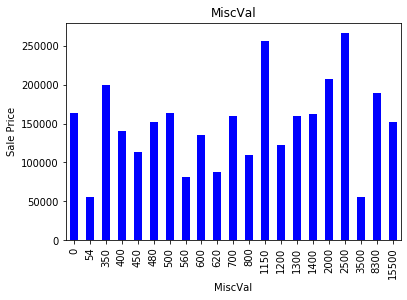

MoSold
1     151650
2     173250
3     165250
4     147000
5     154000
6     163000
7     165195
8     174450
9     185900
10    159000
11    173000
12    178000
Name: SalePrice, dtype: int64


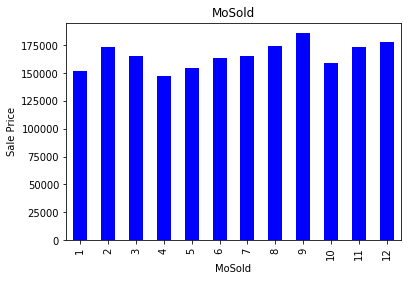

In [35]:
for feature in discrete_feature:
    data=train.copy()
    print(data.groupby(feature)["SalePrice"].median())
    data.groupby(feature)["SalePrice"].median().plot.bar(color="b")
    plt.xlabel(feature)
    plt.ylabel("Sale Price")
    plt.title(feature)
    plt.show()# here the plt.show is impot so that all the charts can be displayed eventhough we alredy worte the %matplotlibinline which only will execute the last chart of the loop and as we will need all plot s so we need to run the plot code again and again therefore we used plt.show()

In [36]:
continous=[feature for feature in numerical if feature not in discrete_feature and feature not in year_feature + ["Id"]]

In [37]:
continous

['LotFrontage',
 'LotArea',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'GrLivArea',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 'ScreenPorch',
 'SalePrice']

In [38]:
len(continous)

16

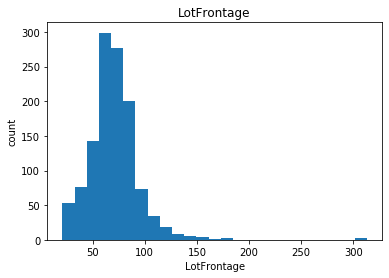

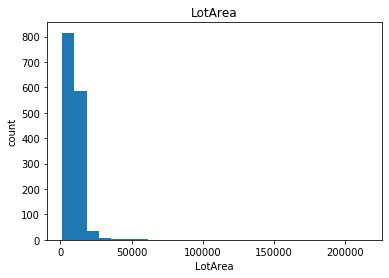

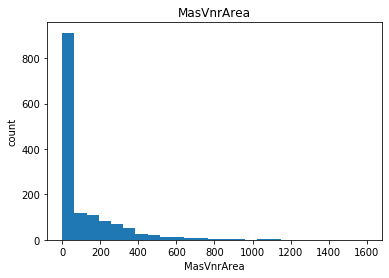

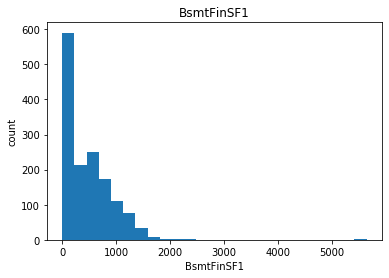

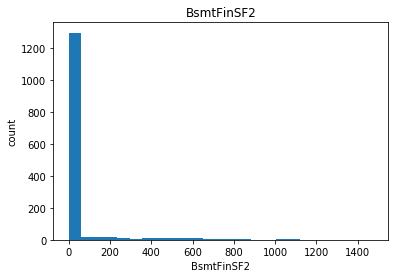

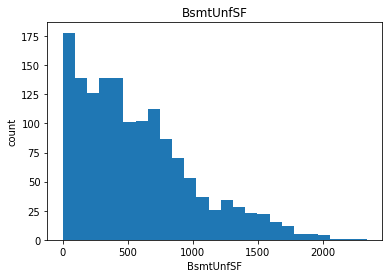

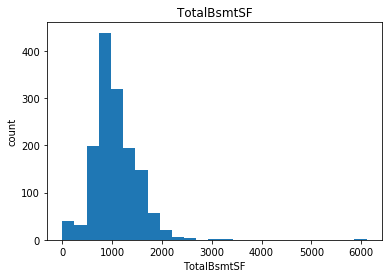

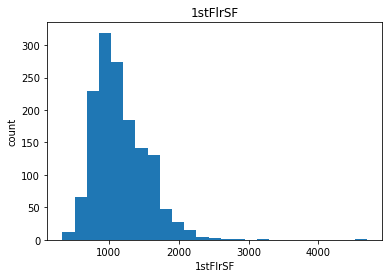

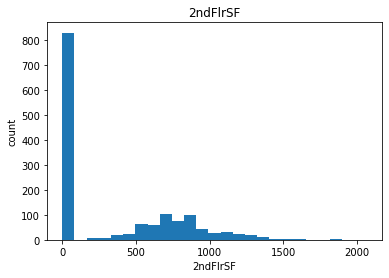

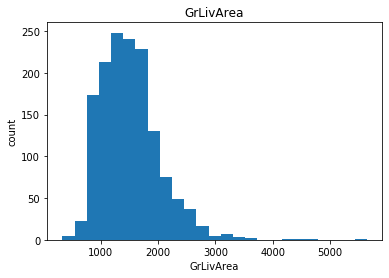

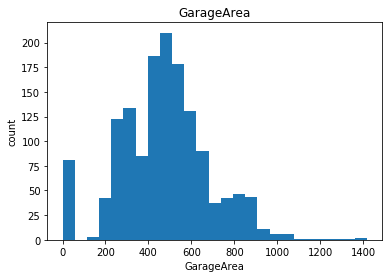

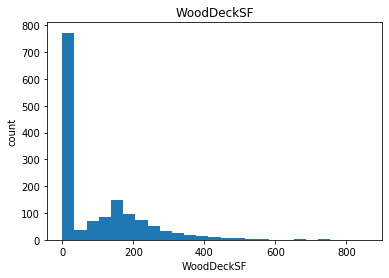

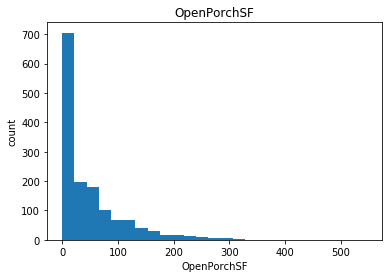

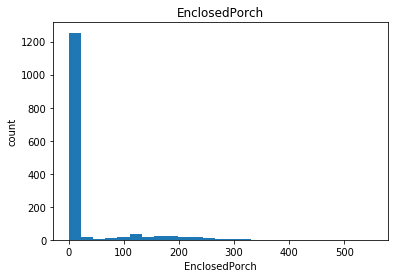

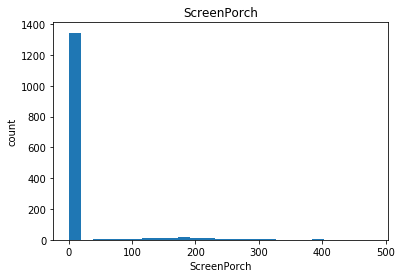

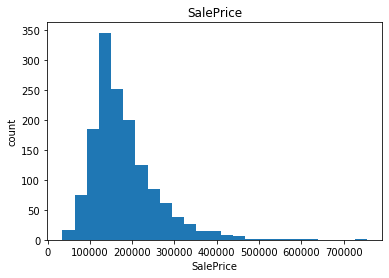

In [39]:
for feature in continous:
    data=train.copy()
    data[feature].plot(kind="hist",bins=25)
    plt.xlabel(feature)
    plt.ylabel("count")
    plt.title(feature)
    plt.show()

In [40]:
continous

['LotFrontage',
 'LotArea',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'GrLivArea',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 'ScreenPorch',
 'SalePrice']

In [41]:
a=[feature for feature in continous if 0 not in continous]

In [42]:
a

['LotFrontage',
 'LotArea',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'GrLivArea',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 'ScreenPorch',
 'SalePrice']

In [43]:
a=pd.DataFrame()
a["normal_val"]=train.LotFrontage
a["logval"]=np.log(train.LotFrontage)

In [44]:
a

,normal_val,logval
0,65.0,4.174387
1,80.0,4.382027
2,68.0,4.219508
3,60.0,4.094345
4,84.0,4.430817
...,...,...
1455,62.0,4.127134
1456,85.0,4.442651
1457,66.0,4.189655
1458,68.0,4.219508


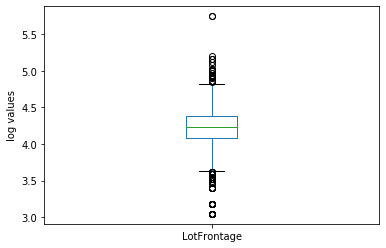

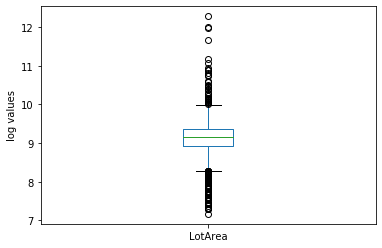

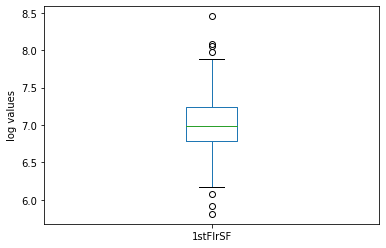

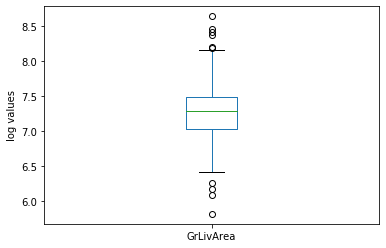

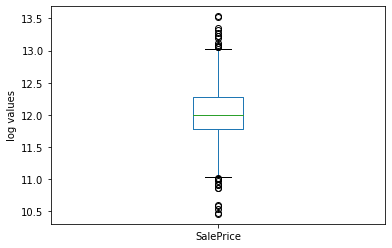

In [45]:
for feature in continous:
    data=train.copy()
    if 0 in data[feature].unique():
        pass
    else:
        np.log(data[feature]).plot(kind="box")
        plt.ylabel("log values")
        plt.show()

In [46]:
categorical=[i for i in train.columns if train[i].dtypes =="O"  ] #gives only the numrical dtype when != "O" and the object types when =="O"

In [47]:
categorical

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [48]:
len(categorical)

43

In [49]:
train[categorical].head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,NaN,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,Gd,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal


In [50]:
i=0
for feature in categorical:
    i=i+1
    a=train[feature].unique()
    print("%d. The feature is %s and the number of categories in it are %d "%(i,feature,len(a)))

1. The feature is MSZoning and the number of categories in it are 5 
2. The feature is Street and the number of categories in it are 2 
3. The feature is Alley and the number of categories in it are 3 
4. The feature is LotShape and the number of categories in it are 4 
5. The feature is LandContour and the number of categories in it are 4 
6. The feature is Utilities and the number of categories in it are 2 
7. The feature is LotConfig and the number of categories in it are 5 
8. The feature is LandSlope and the number of categories in it are 3 
9. The feature is Neighborhood and the number of categories in it are 25 
10. The feature is Condition1 and the number of categories in it are 9 
11. The feature is Condition2 and the number of categories in it are 8 
12. The feature is BldgType and the number of categories in it are 5 
13. The feature is HouseStyle and the number of categories in it are 8 
14. The feature is RoofStyle and the number of categories in it are 6 
15. The feature 

In [51]:
i=[]
for feature in categorical:
    a=len(train[feature].unique())
    i.append(a)

In [52]:
max(i)#hence this is the highest no of caterories in the categorical 

25

MSZoning
C (all)     74700
FV         205950
RH         136500
RL         174000
RM         120500
Name: SalePrice, dtype: int64


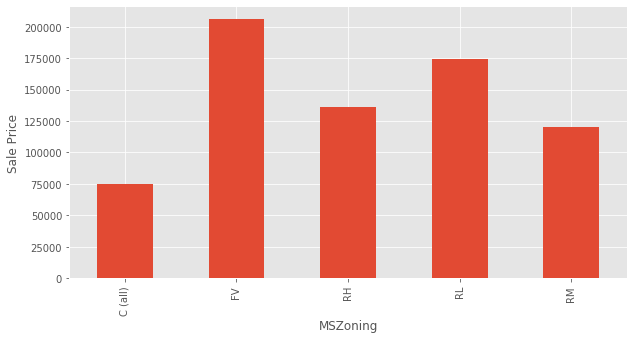

Street
Grvl    114250
Pave    163000
Name: SalePrice, dtype: int64


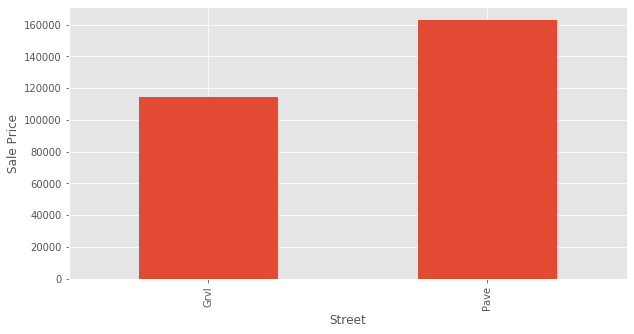

Alley
Grvl    119500
Pave    172500
Name: SalePrice, dtype: int64


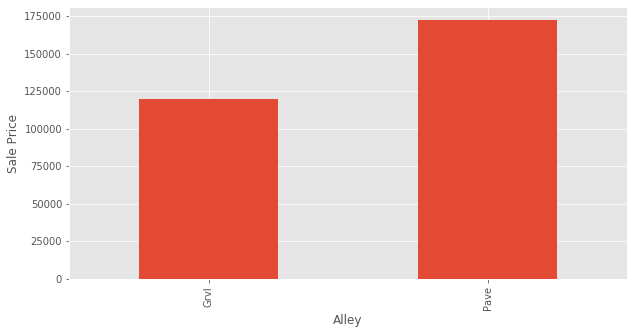

LotShape
IR1    189000
IR2    221000
IR3    203570
Reg    146000
Name: SalePrice, dtype: int64


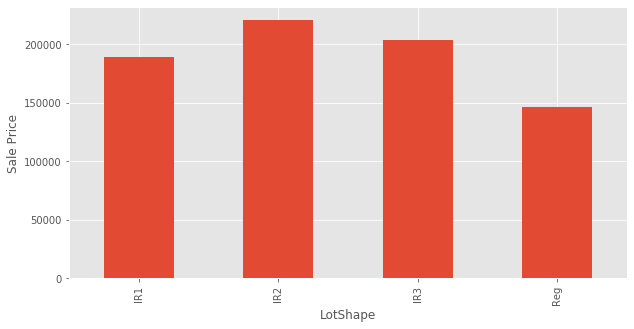

LandContour
Bnk    139400
HLS    222250
Low    190000
Lvl    162900
Name: SalePrice, dtype: int64


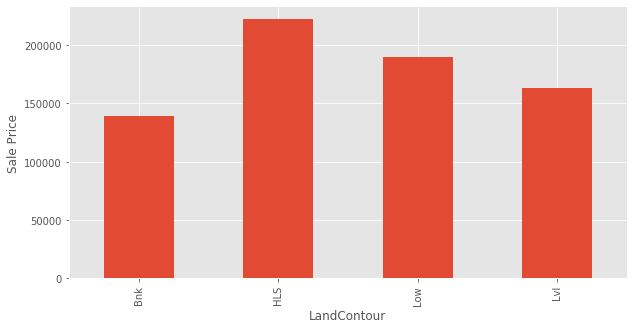

Utilities
AllPub    163000
NoSeWa    137500
Name: SalePrice, dtype: int64


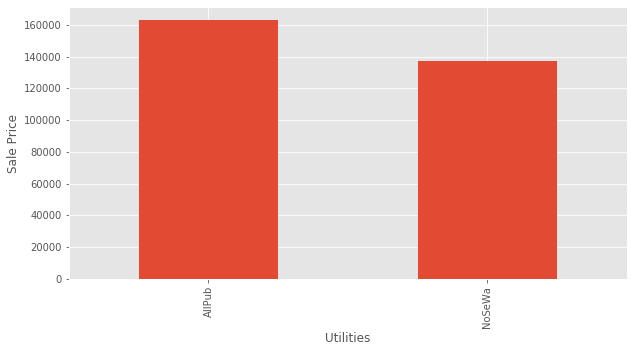

LotConfig
Corner     160000.0
CulDSac    199262.0
FR2        165000.0
FR3        195450.0
Inside     159697.5
Name: SalePrice, dtype: float64


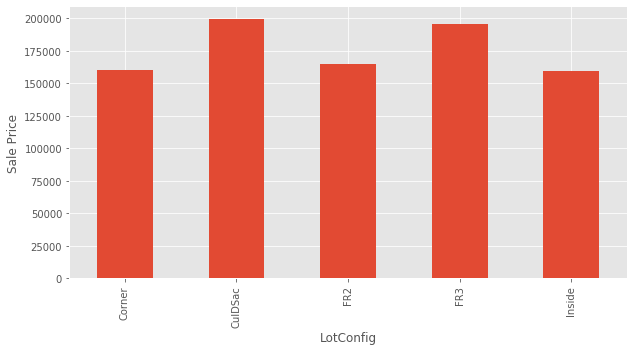

LandSlope
Gtl    161875
Mod    186700
Sev    185000
Name: SalePrice, dtype: int64


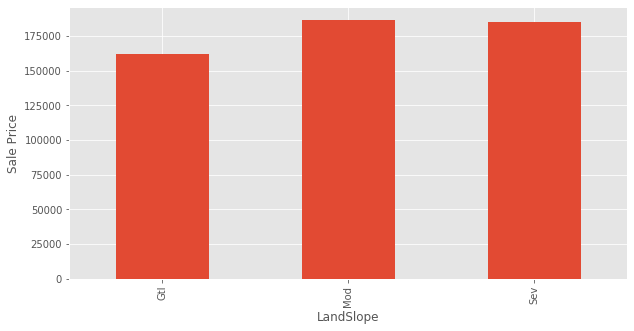

Neighborhood
Blmngtn    191000
Blueste    137500
BrDale     106000
BrkSide    124300
ClearCr    200250
CollgCr    197200
Crawfor    200624
Edwards    121750
Gilbert    181000
IDOTRR     103000
MeadowV     88000
Mitchel    153500
NAmes      140000
NPkVill    146000
NWAmes     182900
NoRidge    301500
NridgHt    315000
OldTown    119000
SWISU      139500
Sawyer     135000
SawyerW    179900
Somerst    225500
StoneBr    278000
Timber     228475
Veenker    218000
Name: SalePrice, dtype: int64


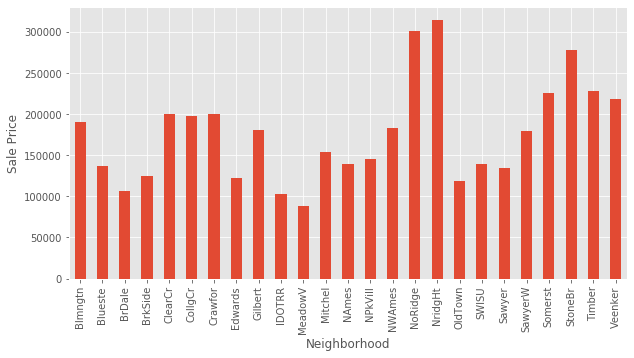

Condition1
Artery    119550
Feedr     140000
Norm      166500
PosA      212500
PosN      200000
RRAe      142500
RRAn      171495
RRNe      190750
RRNn      214000
Name: SalePrice, dtype: int64


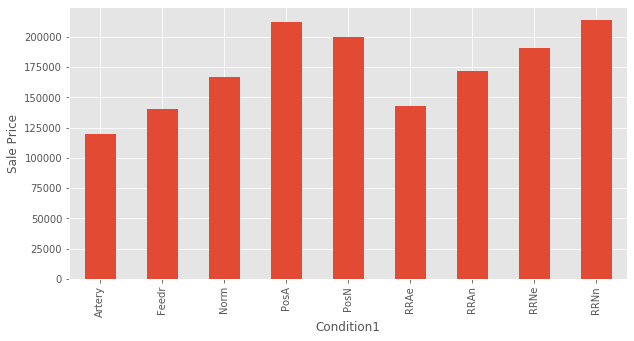

Condition2
Artery    106500
Feedr     127500
Norm      163500
PosA      325000
PosN      284875
RRAe      190000
RRAn      136905
RRNn       96750
Name: SalePrice, dtype: int64


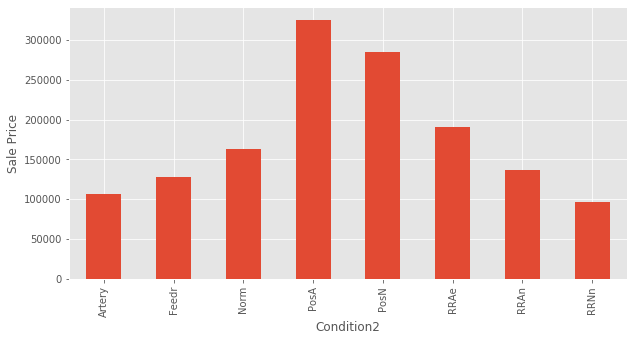

BldgType
1Fam      167900
2fmCon    127500
Duplex    135980
Twnhs     137500
TwnhsE    172200
Name: SalePrice, dtype: int64


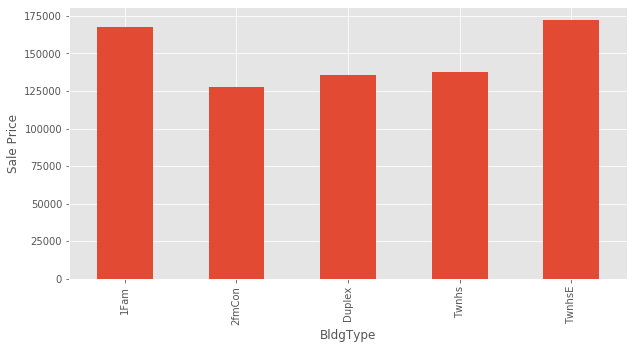

HouseStyle
1.5Fin    132000
1.5Unf    111250
1Story    154750
2.5Fin    194000
2.5Unf    133900
2Story    190000
SFoyer    135960
SLvl      164500
Name: SalePrice, dtype: int64


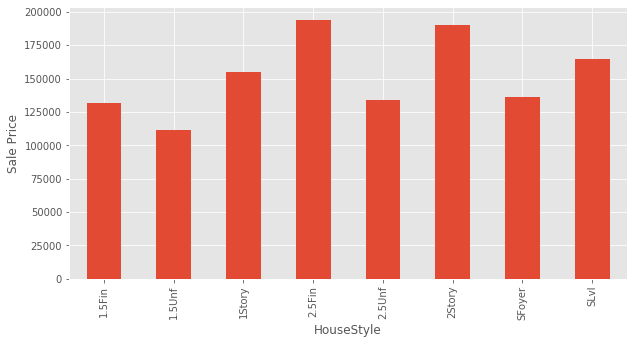

RoofStyle
Flat       185000
Gable      160000
Gambrel    139000
Hip        176500
Mansard    175000
Shed       225000
Name: SalePrice, dtype: int64


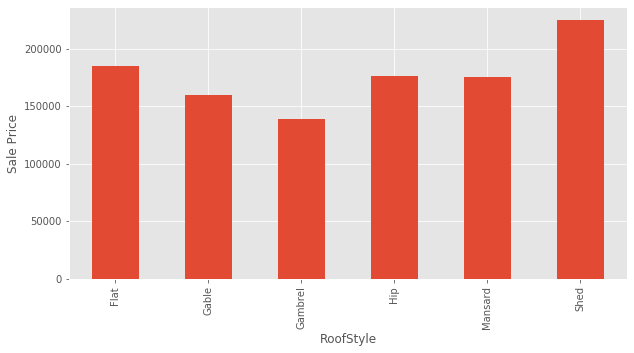

RoofMatl
ClyTile    160000
CompShg    162000
Membran    241500
Metal      180000
Roll       137000
Tar&Grv    167000
WdShake    242000
WdShngl    332500
Name: SalePrice, dtype: int64


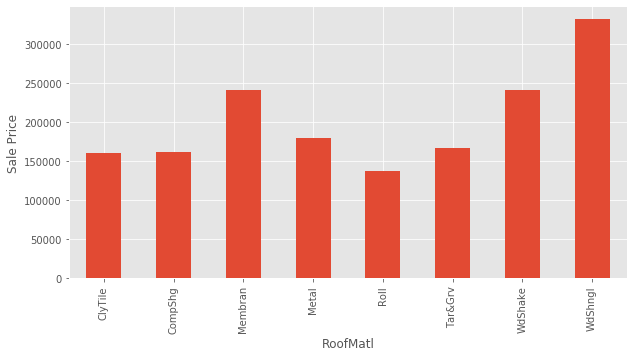

Exterior1st
AsbShng    108000.0
AsphShn    100000.0
BrkComm     71000.0
BrkFace    165750.0
CBlock     105000.0
CemntBd    236500.0
HdBoard    149900.0
ImStucc    262000.0
MetalSd    139000.0
Plywood    167450.0
Stone      258500.0
Stucco     144000.0
VinylSd    200000.0
Wd Sdng    138943.5
WdShing    128700.0
Name: SalePrice, dtype: float64


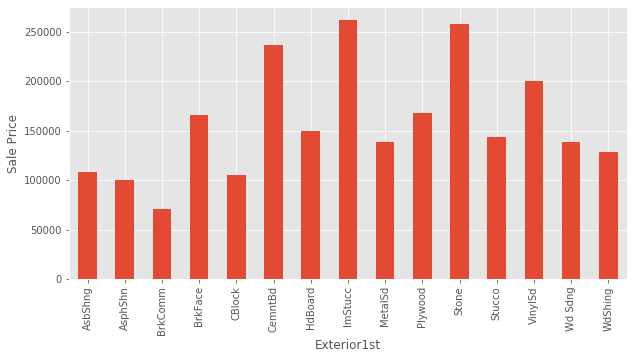

Exterior2nd
AsbShng    111000.0
AsphShn    139000.0
Brk Cmn    147000.0
BrkFace    160000.0
CBlock     105000.0
CmentBd    238750.0
HdBoard    155000.0
ImStucc    187600.0
MetalSd    138750.0
Other      319000.0
Plywood    160750.0
Stone      177000.0
Stucco     142000.0
VinylSd    200070.5
Wd Sdng    138000.0
Wd Shng    138225.0
Name: SalePrice, dtype: float64


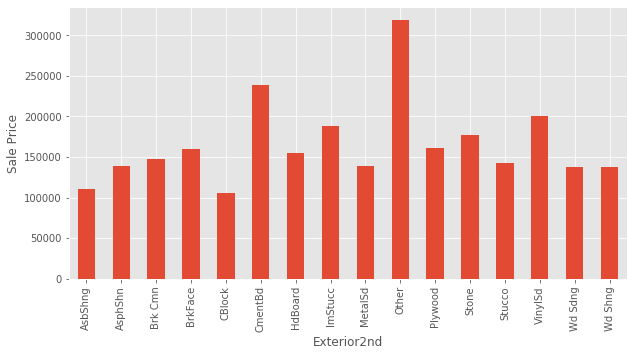

MasVnrType
BrkCmn     139000
BrkFace    181000
None       143000
Stone      246839
Name: SalePrice, dtype: int64


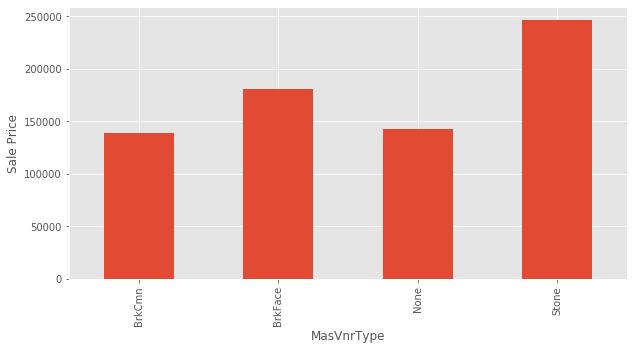

ExterQual
Ex    364606.5
Fa     82250.0
Gd    220000.0
TA    139450.0
Name: SalePrice, dtype: float64


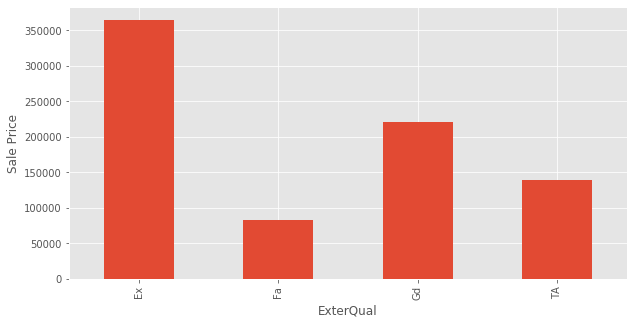

ExterCond
Ex    161000
Fa     95750
Gd    151250
Po     76500
TA    167370
Name: SalePrice, dtype: int64


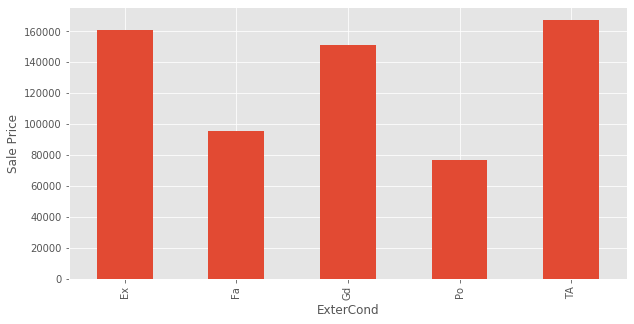

Foundation
BrkTil    125250
CBlock    141500
PConc     205000
Slab      104150
Stone     126500
Wood      164000
Name: SalePrice, dtype: int64


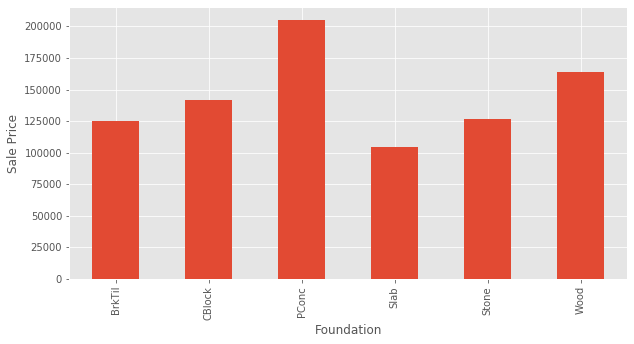

BsmtQual
Ex    318000
Fa    112000
Gd    192070
TA    135500
Name: SalePrice, dtype: int64


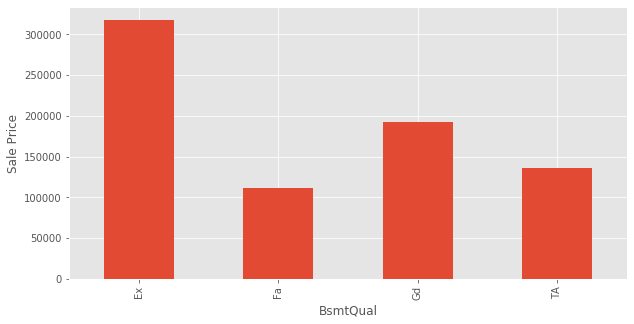

BsmtCond
Fa    118500
Gd    193879
Po     64000
TA    165000
Name: SalePrice, dtype: int64


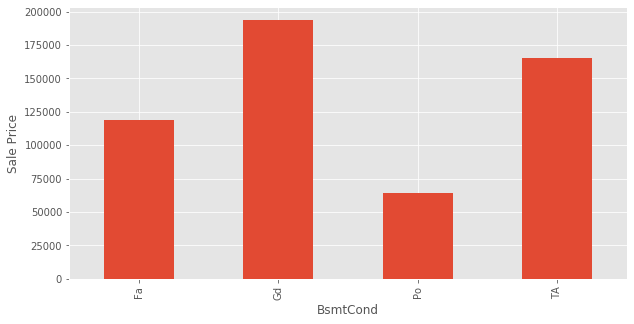

BsmtExposure
Av    185850
Gd    226975
Mn    182450
No    154000
Name: SalePrice, dtype: int64


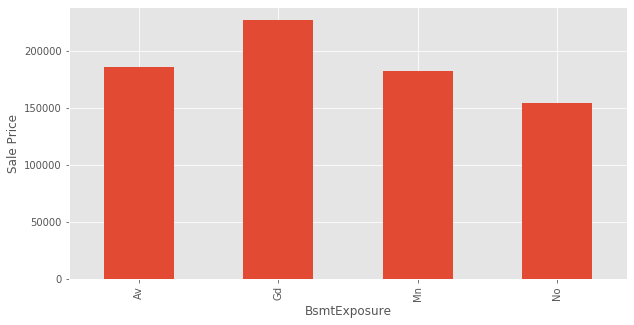

BsmtFinType1
ALQ    149250
BLQ    139100
GLQ    213750
LwQ    139000
Rec    142000
Unf    161750
Name: SalePrice, dtype: int64


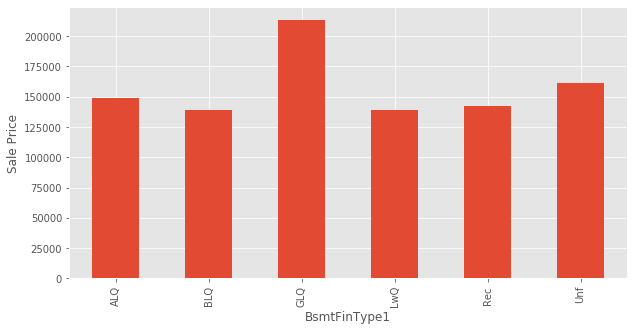

BsmtFinType2
ALQ    174900
BLQ    143000
GLQ    203125
LwQ    154000
Rec    148750
Unf    167000
Name: SalePrice, dtype: int64


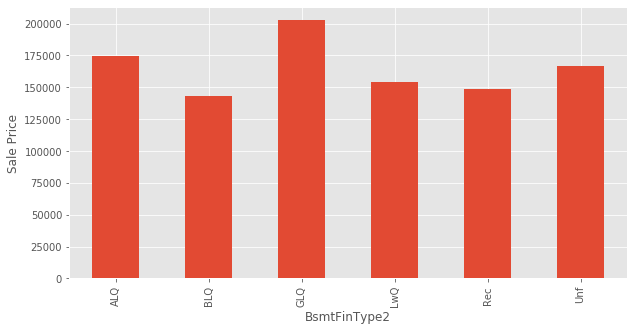

Heating
Floor     72500
GasA     164500
GasW     134950
Grav      79000
OthW     125750
Wall      91450
Name: SalePrice, dtype: int64


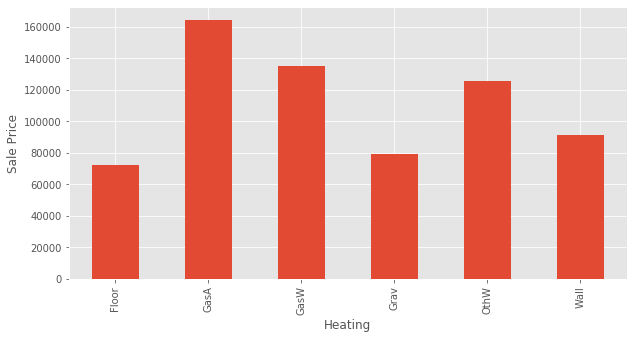

HeatingQC
Ex    194700
Fa    123500
Gd    152000
Po     87000
TA    135000
Name: SalePrice, dtype: int64


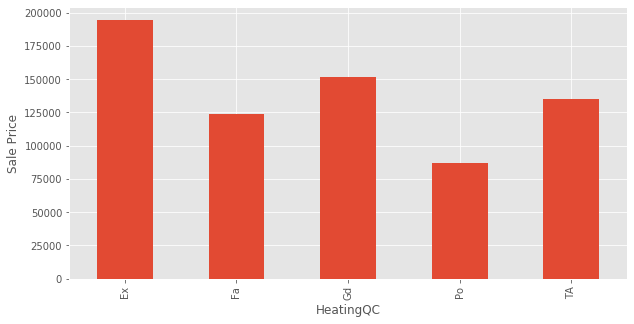

CentralAir
N     98000
Y    168000
Name: SalePrice, dtype: int64


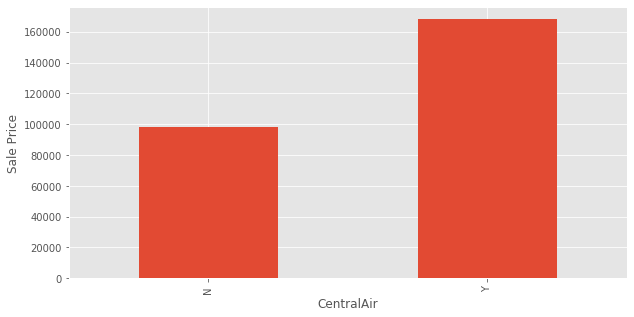

Electrical
FuseA    121250
FuseF    115000
FuseP     82000
Mix       67000
SBrkr    170000
Name: SalePrice, dtype: int64


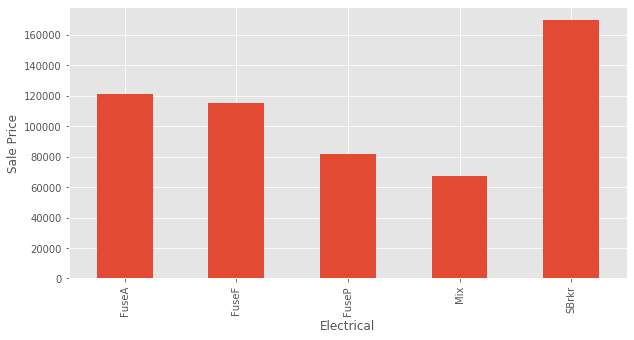

KitchenQual
Ex    316750
Fa    115000
Gd    201400
TA    137000
Name: SalePrice, dtype: int64


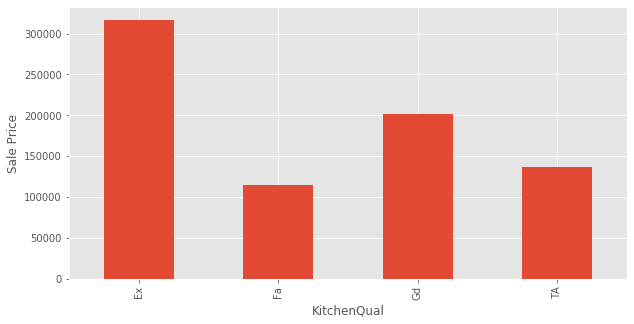

Functional
Maj1    140750
Maj2     85000
Min1    139000
Min2    140000
Mod     137900
Sev     129000
Typ     165500
Name: SalePrice, dtype: int64


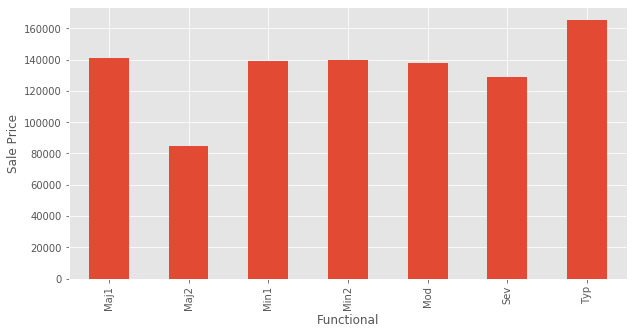

FireplaceQu
Ex    314250
Fa    158000
Gd    206950
Po    131500
TA    187500
Name: SalePrice, dtype: int64


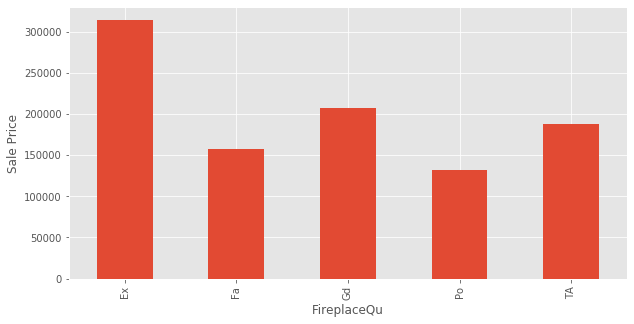

GarageType
2Types     159000
Attchd     185000
Basment    148000
BuiltIn    227500
CarPort    108000
Detchd     129500
Name: SalePrice, dtype: int64


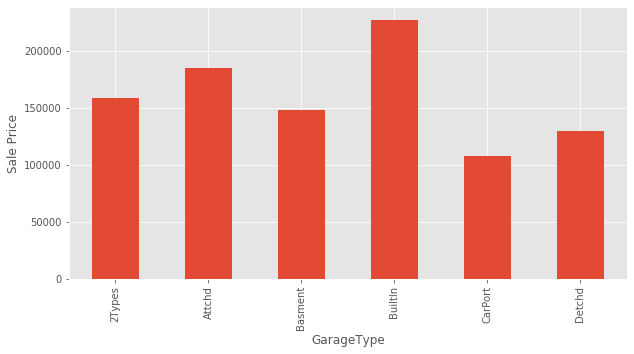

GarageFinish
Fin    215000
RFn    190000
Unf    135000
Name: SalePrice, dtype: int64


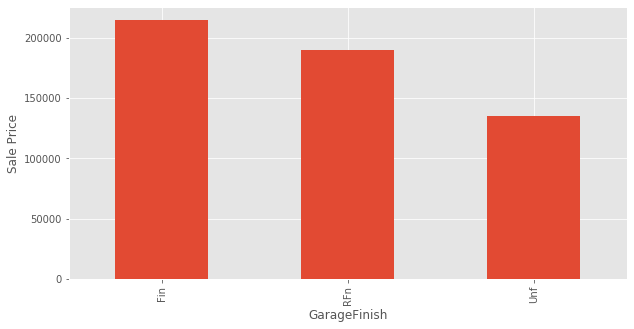

GarageQual
Ex    127500
Fa    115000
Gd    209115
Po     96500
TA    170000
Name: SalePrice, dtype: int64


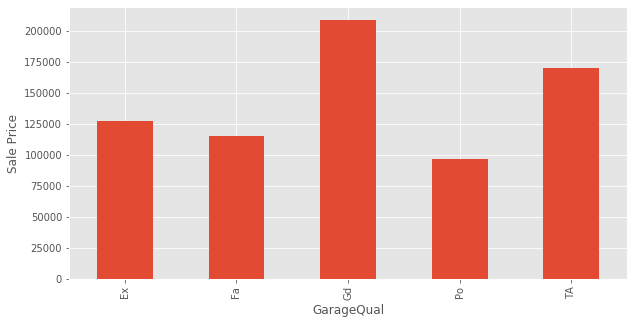

GarageCond
Ex    124000
Fa    114504
Gd    148000
Po    108000
TA    170000
Name: SalePrice, dtype: int64


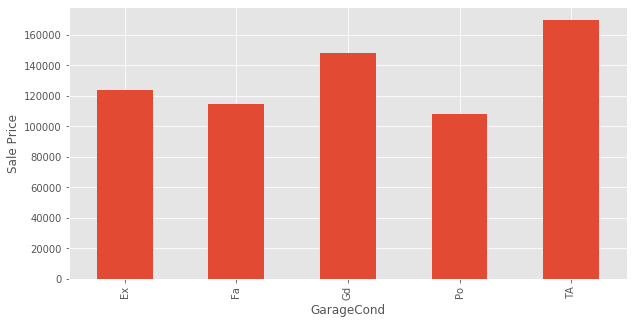

PavedDrive
N    111000
P    132250
Y    168500
Name: SalePrice, dtype: int64


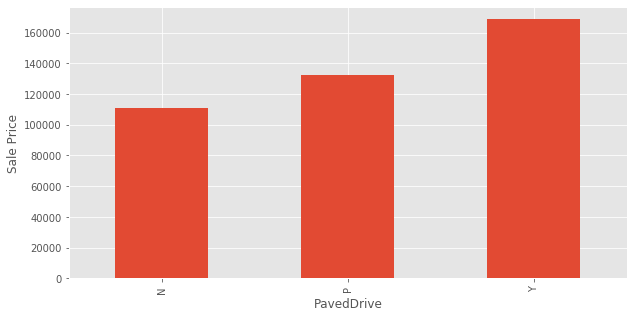

PoolQC
Ex    490000
Fa    215500
Gd    171000
Name: SalePrice, dtype: int64


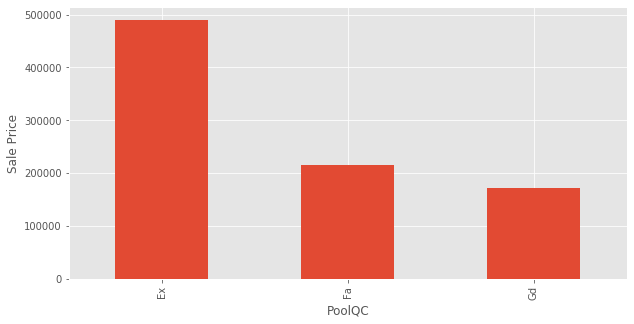

Fence
GdPrv    167500
GdWo     138750
MnPrv    137450
MnWw     130000
Name: SalePrice, dtype: int64


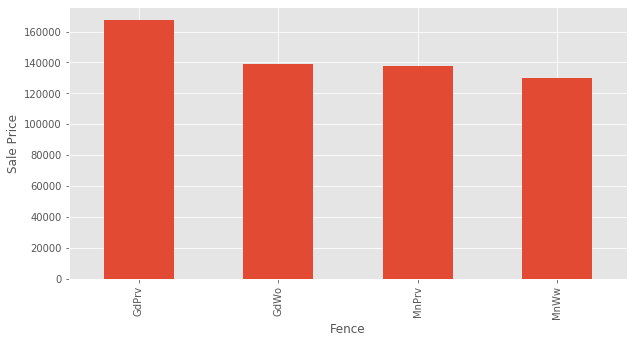

MiscFeature
Gar2    170750
Othr     94000
Shed    144000
TenC    250000
Name: SalePrice, dtype: int64


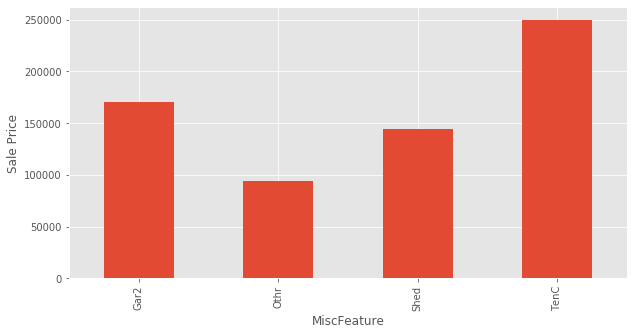

SaleType
COD      139000
CWD      188750
Con      269600
ConLD    140000
ConLI    125000
ConLw    144000
New      247453
Oth      116050
WD       158000
Name: SalePrice, dtype: int64


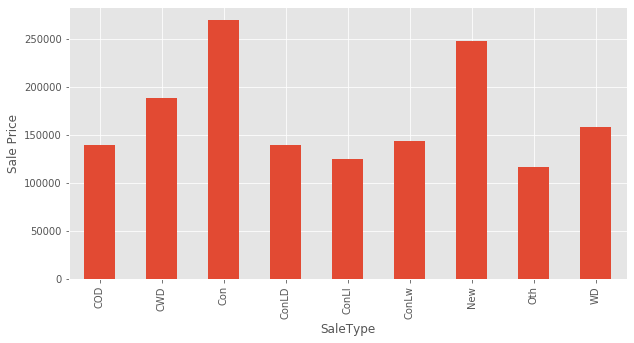

SaleCondition
Abnorml    130000
AdjLand    104000
Alloca     148145
Family     140500
Normal     160000
Partial    244600
Name: SalePrice, dtype: int64


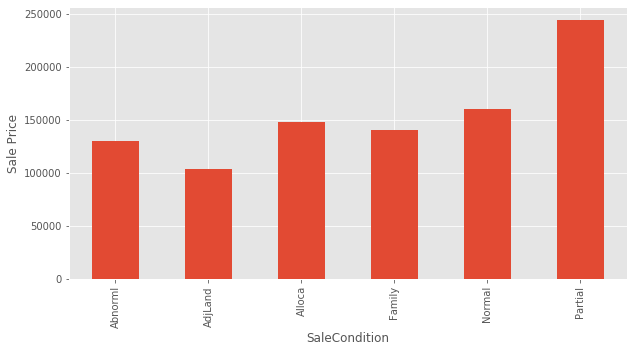

In [53]:
for feature in categorical:
    data=train.copy()
    plt.figure(figsize=(10,5))
    plt.style.use('ggplot')
    print(data.groupby(feature)["SalePrice"].median())
    data.groupby(feature)["SalePrice"].median().plot(kind="bar")
    plt.xlabel(feature)
    plt.ylabel("Sale Price")
    plt.show()

Analyis of null values

In [54]:
train.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

analysing sales col

In [55]:
train.SalePrice.describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

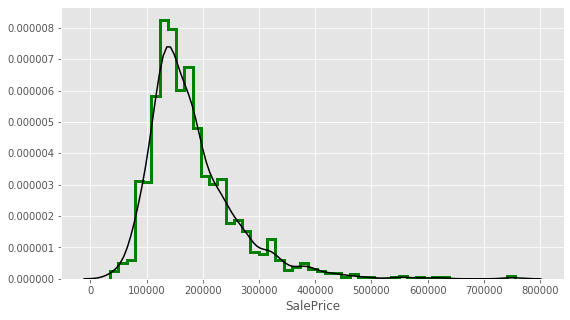

In [56]:
#hist
plt.figure(figsize=(9,5))
sns.distplot(train.SalePrice,color="k",hist_kws={"histtype": "step", "linewidth": 3,
                            "alpha": 1, "color": "g"})

In [57]:
print("The skewness of Sale Price col is %.3f"%(train.SalePrice.skew()))#the skewness
print("The kurtosis of Sale Price col is %.3f"%(train.SalePrice.kurt()))#the kurtosis

The skewness of Sale Price col is 1.883
The kurtosis of Sale Price col is 6.536


From the above we can say that the data is highly skewed as it is greater than 1.furthurmore as it is falling towards the right it mean it is highly positively skewed and the peak is slightly left of the average whick means the houses were bring sold less than that the average price

From the above we can say that the data had high kurtosis and it can be classified as leptokurtic as the kurtosis is greater than 3 and there is a bulk of outliers here

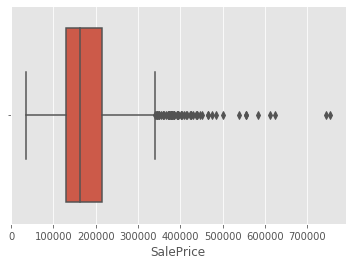

In [58]:
sns.boxplot(train.SalePrice)

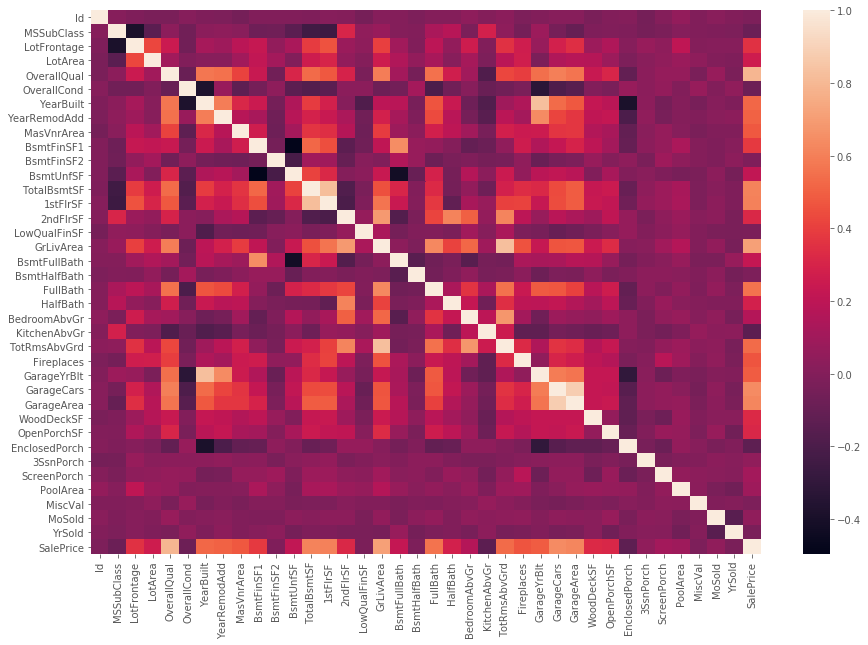

In [59]:
corr=train.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr)

In [60]:
from scipy.stats import norm

In [61]:
cols=corr.nlargest(10,"SalePrice")["SalePrice"].index

In [62]:
train[['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
       'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt']].corr()#1st way to amnually input the cols and find corr

,SalePrice,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt
SalePrice,1.000000,0.790982,0.708624,0.640409,0.623431,0.613581,0.605852,0.560664,0.533723,0.522897
OverallQual,0.790982,1.000000,0.593007,0.600671,0.562022,0.537808,0.476224,0.550600,0.427452,0.572323
GrLivArea,0.708624,0.593007,1.000000,0.467247,0.468997,0.454868,0.566024,0.630012,0.825489,0.199010
GarageCars,0.640409,0.600671,0.467247,1.000000,0.882475,0.434585,0.439317,0.469672,0.362289,0.537850
GarageArea,0.623431,0.562022,0.468997,0.882475,1.000000,0.486665,0.489782,0.405656,0.337822,0.478954
TotalBsmtSF,0.613581,0.537808,0.454868,0.434585,0.486665,1.000000,0.819530,0.323722,0.285573,0.391452
1stFlrSF,0.605852,0.476224,0.566024,0.439317,0.489782,0.819530,1.000000,0.380637,0.409516,0.281986
FullBath,0.560664,0.550600,0.630012,0.469672,0.405656,0.323722,0.380637,1.000000,0.554784,0.468271
TotRmsAbvGrd,0.533723,0.427452,0.825489,0.362289,0.337822,0.285573,0.409516,0.554784,1.000000,0.095589
YearBuilt,0.522897,0.572323,0.199010,0.537850,0.478954,0.391452,0.281986,0.468271,0.095589,1.000000


In [63]:
cm=np.corrcoef(train[cols].values.T)
cm            #2nd method using transpose and corrcoef

array([[1.        , 0.7909816 , 0.70862448, 0.6404092 , 0.62343144,
        0.61358055, 0.60585218, 0.56066376, 0.53372316, 0.52289733],
       [0.7909816 , 1.        , 0.59300743, 0.60067072, 0.56202176,
        0.5378085 , 0.47622383, 0.55059971, 0.42745234, 0.57232277],
       [0.70862448, 0.59300743, 1.        , 0.46724742, 0.46899748,
        0.4548682 , 0.56602397, 0.63001165, 0.82548937, 0.19900971],
       [0.6404092 , 0.60067072, 0.46724742, 1.        , 0.88247541,
        0.43458483, 0.43931681, 0.46967204, 0.36228857, 0.53785009],
       [0.62343144, 0.56202176, 0.46899748, 0.88247541, 1.        ,
        0.48666546, 0.48978165, 0.40565621, 0.33782212, 0.47895382],
       [0.61358055, 0.5378085 , 0.4548682 , 0.43458483, 0.48666546,
        1.        , 0.81952998, 0.32372241, 0.28557256, 0.391452  ],
       [0.60585218, 0.47622383, 0.56602397, 0.43931681, 0.48978165,
        0.81952998, 1.        , 0.38063749, 0.40951598, 0.28198586],
       [0.56066376, 0.55059971, 0.6300116

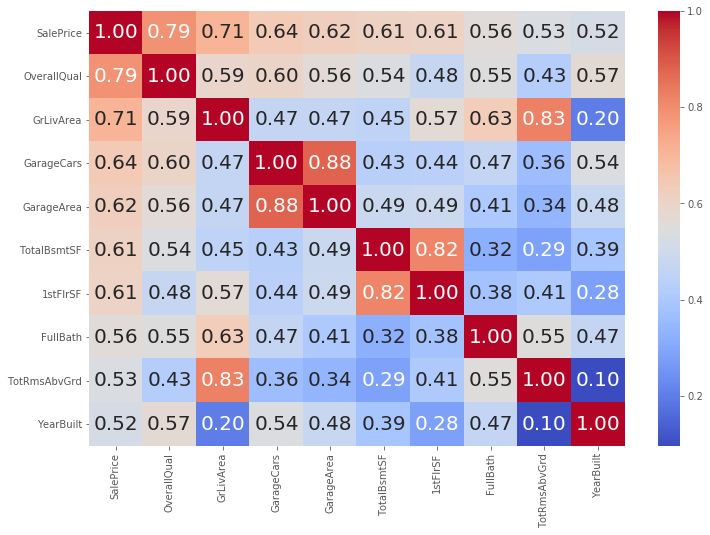

In [64]:
plt.figure(figsize=(12,8))
sns.heatmap(cm,annot=True,cmap="coolwarm",xticklabels=cols.values,yticklabels=cols.values,annot_kws={"size":20},fmt='.2f')


Here we can definately see the cols in which there is a lagre amount of corr and as per our research we cound the necessary cols for us from the above top 10 most correlated cols.
The names of the cols are as follows:
SalePrice, OverallQual, GrLivArea, GarageCars, TotalBsmtSF, FullBath, YearBuilt

Getting rid of the null values

In [65]:
only_null(train)

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageCond        81
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
BsmtExposure      38
BsmtFinType2      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrArea         8
MasVnrType         8
Electrical         1
dtype: int64

In [66]:
len(only_null(train))

19

In [67]:
train.drop(only_null(train).index,axis=1,inplace=True)

In [68]:
train

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,ExterQual,ExterCond,Foundation,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageCars,GarageArea,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,Gd,TA,PConc,706,0,150,856,GasA,Ex,Y,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,2,548,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,TA,TA,CBlock,978,0,284,1262,GasA,Ex,Y,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,2,460,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,Gd,TA,PConc,486,0,434,920,GasA,Ex,Y,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,2,608,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,TA,TA,BrkTil,216,0,540,756,GasA,Gd,Y,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,3,642,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,Gd,TA,PConc,655,0,490,1145,GasA,Ex,Y,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,3,836,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,TA,TA,PConc,0,0,953,953,GasA,Ex,Y,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,2,460,Y,0,40,0,0,0,0,0,8,2007,WD,Normal,175000
1456,1457,20,RL,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,TA,TA,CBlock,790,163,589,1542,GasA,TA,Y,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,2,500,Y,349,0,0,0,0,0,0,2,2010,WD,Normal,210000
1457,1458,70,RL,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,Ex,Gd,Stone,275,0,877,1152,GasA,Ex,Y,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,1,252,Y,0,60,0,0,0,0,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,9717,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,TA,TA,CBlock,49,1029,0,1078,GasA,Gd,Y,1078,0,0,1078,1,0,1,0,2,1,Gd,5,Typ,0,1,240,Y,366,0,112,0,0,0,0,4,2010,WD,Normal,142125


In [69]:
a=[i for i in cols if i in only_null(train).index]#double checking the that if any of our main feature cols are the cols which might have been dropped by us due to null values

In [70]:
a#as there was no result means none of the cols were dropped

[]

In [71]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [72]:
only_null(test)

PoolQC          1456
MiscFeature     1408
Alley           1352
Fence           1169
FireplaceQu      730
LotFrontage      227
GarageCond        78
GarageQual        78
GarageYrBlt       78
GarageFinish      78
GarageType        76
BsmtCond          45
BsmtQual          44
BsmtExposure      44
BsmtFinType1      42
BsmtFinType2      42
MasVnrType        16
MasVnrArea        15
MSZoning           4
BsmtHalfBath       2
Utilities          2
Functional         2
BsmtFullBath       2
BsmtFinSF2         1
BsmtFinSF1         1
Exterior2nd        1
BsmtUnfSF          1
TotalBsmtSF        1
SaleType           1
Exterior1st        1
KitchenQual        1
GarageArea         1
GarageCars         1
dtype: int64

In [73]:
train.head()

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,ExterQual,ExterCond,Foundation,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageCars,GarageArea,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,Gd,TA,PConc,706,0,150,856,GasA,Ex,Y,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,2,548,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,TA,TA,CBlock,978,0,284,1262,GasA,Ex,Y,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,2,460,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,Gd,TA,PConc,486,0,434,920,GasA,Ex,Y,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,2,608,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,TA,TA,BrkTil,216,0,540,756,GasA,Gd,Y,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,3,642,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,Gd,TA,PConc,655,0,490,1145,GasA,Ex,Y,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,3,836,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,250000


In [74]:
feature_cols=['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
test_null=[cols for cols in only_null(test).index if cols not in feature_cols]

In [75]:
test_null

['PoolQC',
 'MiscFeature',
 'Alley',
 'Fence',
 'FireplaceQu',
 'LotFrontage',
 'GarageCond',
 'GarageQual',
 'GarageYrBlt',
 'GarageFinish',
 'GarageType',
 'BsmtCond',
 'BsmtQual',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'MasVnrType',
 'MasVnrArea',
 'MSZoning',
 'BsmtHalfBath',
 'Utilities',
 'Functional',
 'BsmtFullBath',
 'BsmtFinSF2',
 'BsmtFinSF1',
 'Exterior2nd',
 'BsmtUnfSF',
 'SaleType',
 'Exterior1st',
 'KitchenQual',
 'GarageArea']

In [76]:
test.drop(test_null,axis=1,inplace=True)

In [77]:
train.drop("Id",axis=1,inplace=True)
test.drop("Id",axis=1,inplace=True)

In [78]:
train.shape

(1460, 61)

In [79]:
test.shape

(1459, 48)

In [80]:
test[[ 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']].isnull().sum()

OverallQual    0
GrLivArea      0
GarageCars     1
TotalBsmtSF    1
FullBath       0
YearBuilt      0
dtype: int64

In [81]:
test.GarageCars.fillna(test.GarageCars.mean(),inplace=True)
test.TotalBsmtSF.fillna(test.TotalBsmtSF.median(),inplace=True)


In [82]:
test[[ 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']].isnull().sum()

OverallQual    0
GrLivArea      0
GarageCars     0
TotalBsmtSF    0
FullBath       0
YearBuilt      0
dtype: int64

In [83]:
train[[ 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt','SalePrice']]

,OverallQual,GrLivArea,GarageCars,TotalBsmtSF,FullBath,YearBuilt,SalePrice
0,7,1710,2,856,2,2003,208500
1,6,1262,2,1262,2,1976,181500
2,7,1786,2,920,2,2001,223500
3,7,1717,3,756,1,1915,140000
4,8,2198,3,1145,2,2000,250000
...,...,...,...,...,...,...,...
1455,6,1647,2,953,2,1999,175000
1456,6,2073,2,1542,2,1978,210000
1457,7,2340,1,1152,2,1941,266500
1458,5,1078,1,1078,1,1950,142125


In [84]:
X=train[[ 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']]
y=train["SalePrice"]

In [85]:
#train-test-split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=0)

Linear Regression

In [86]:
#Linear Regression

from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [87]:
y_pred_lr=regressor.predict(X_test)

In [88]:
regressor.score(X_test,y_test)

0.8050070750221924

In [89]:
from sklearn.metrics import mean_squared_error

In [90]:
print(np.sqrt(mean_squared_error(y_test,y_pred_lr)))

36606.19975534959


Lasso Regression

In [91]:
# lasso regression
from sklearn.linear_model import Lasso
ll=Lasso(alpha=0.01)
ll.fit(X_train,y_train)

Lasso(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [92]:
y_pred_ll=ll.predict(X_test)

In [93]:
ll.score(X_test,y_test)

0.8050070623172112

In [94]:
from sklearn.metrics import mean_squared_error

In [95]:
np.sqrt(mean_squared_error(y_test,y_pred_ll))

36606.20094790844

Ridge Regression

In [96]:
#Ridge regression
from sklearn.linear_model import Ridge
rr=Ridge(alpha=0.01)
rr.fit(X_train,y_train)

Ridge(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [97]:
y_pred_rr=rr.predict(X_test)

In [98]:
rr.score(X_test,y_test)

0.8050073093896731

In [99]:
from sklearn.metrics import mean_squared_error

In [100]:
print(np.sqrt(mean_squared_error(y_test,y_pred_rr)))

36606.17775633247


Elastic Net

In [101]:
#ElasticNet
from sklearn.linear_model import ElasticNet

In [102]:
el=ElasticNet(alpha=0.01)
el.fit(X_train,y_train)

ElasticNet(alpha=0.01, copy_X=True, fit_intercept=True, l1_ratio=0.5,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [103]:
y_pred_el=el.predict(X_test)

In [104]:
el.score(X_test,y_test)

0.8051562666619483

In [105]:
from sklearn.metrics import mean_squared_error

In [106]:
print(np.sqrt(mean_squared_error(y_test,y_pred_el)))

36592.19313433331


Decision Tree

In [107]:
#decision tree
from sklearn.tree import DecisionTreeRegressor

In [108]:
decision_tree=DecisionTreeRegressor(random_state=0)
decision_tree.fit(X_train,y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=0, splitter='best')

In [109]:
y_pred_decision_tree=decision_tree.predict(X_test)

In [110]:
decision_tree.score(X_test,y_test)

0.8355170013723151

In [111]:
print(np.sqrt(mean_squared_error(y_test,y_pred_decision_tree)))

33620.62059604668


Random Forest

In [112]:
#random Forest
from sklearn.ensemble import RandomForestRegressor

In [113]:
random_forest=RandomForestRegressor(n_estimators=10,random_state=0)
random_forest.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=10, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [114]:
y_pred_random_forest=random_forest.predict(X_test)

In [115]:
random_forest.score(X_test,y_test)

0.8303908592113846

In [116]:
print(np.sqrt(mean_squared_error(y_test,y_pred_decision_tree)))

33620.62059604668


Polynomial Regressor

In [117]:
#polynomial Regression
from sklearn.preprocessing import PolynomialFeatures

In [118]:
poly_reg=PolynomialFeatures(degree=2)
X_poly_train=poly_reg.fit_transform(X_train)
lin_rg=LinearRegression()
lin_rg.fit(X_poly_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [119]:
y_pred_poly=lin_rg.predict(poly_reg.fit_transform(X_test))

In [120]:
lin_rg.score(poly_reg.fit_transform(X_test),y_test)

0.8698711825095959

In [121]:
np.sqrt(mean_squared_error(y_test,y_pred_poly))

29904.184254205516

Support Vector Regressor

In [122]:
#svm
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR

In [123]:
sc_X=StandardScaler()
sc_y=StandardScaler()

In [124]:
ba=y_train[:,np.newaxis]

In [125]:
ba.shape

(1314, 1)

In [126]:
ba

array([[201000],
       [145500],
       [319900],
       ...,
       [112000],
       [234000],
       [221000]], dtype=int64)

In [127]:
sc_X_train=sc_X.fit_transform(X_train)
sc_y_train=sc_y.fit_transform(ba)

In [128]:
svr_reg=SVR(kernel="rbf")
svr_reg.fit(sc_X_train,sc_y_train)

C:\Users\Sid Rawat\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [129]:
y_pred_svr=sc_y.inverse_transform(svr_reg.predict(sc_X.transform(X_test)))

In [130]:
svr_reg.score(sc_X.transform(X_test),y_test)

-4.70664637556853

In [131]:
print(np.sqrt(mean_squared_error(y_test,y_pred_svr)))

42206.058161437926


SVR without standard scaler

In [132]:
svr_reg=SVR(kernel="rbf")
svr_reg.fit(X_train,y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [133]:
y_pred_svr=svr_reg.predict(X_test)

In [134]:
svr_reg.score(X_test,y_test)

-0.04000770067431447

In [135]:
print(np.sqrt(mean_squared_error(y_test,y_pred_svr)))

84540.24377796357


The best prediction algorithims were that of the Polynomial regression followed by decison tree and random forest